In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6138599266801057811]

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='1'

# 1. 훈련데이터 준비 (데이터 분리)

In [3]:
# import os, shutil

# org_train_path='../images/cat_dog/input/train'
# copy_train_path = '../images/cat_dog/datasets'

In [4]:
# def copy_files(category_path, start_num, end_num, train_val_path):
#     ## 이동 대상 이미지 파일경로 리스트에 담기
#     image_paths=[]
#     for i in range(start_num, end_num):
#         image_paths.append(os.path.join(org_train_path,category_path+'.'+str(i)+'.jpg'))
#     ## 이동할 폴더 경로 담기
#     target_copy_paths=os.path.join(copy_train_path, train_val_path,category_path)
    
#     # 신규 디렉토리가 존재하지 않으면 생성
#     if not os.path.isdir(target_copy_paths):
#         os.makedirs(target_copy_paths)
    
#     for image_path in image_paths:
#         ## shutil(원본경로, 이동할경로)
#         shutil.copy(image_path, target_copy_paths)
        
#     print('copy job completed')

In [5]:
# copy_files("dog",0,10000,"train")
# copy_files("cat",0,10000,"train")

In [6]:
# copy_files("dog",1000,1250,"validation")
# copy_files("cat",1000,1250,"validation")

In [7]:
import os, shutil
print("훈련데이터 dog 개수", 
      len(os.listdir('../images/cat_dog/datasets/train/dog')))
print("훈련데이터 cat 개수", 
      len(os.listdir('../images/cat_dog/datasets/train/cat')))
print("테스트데이터 dog 개수", 
      len(os.listdir('../images/cat_dog/datasets/validation/dog')))
print("테스트데이터 cat 개수", 
      len(os.listdir('../images/cat_dog/datasets/validation/dog')))

훈련데이터 dog 개수 10000
훈련데이터 cat 개수 10000
테스트데이터 dog 개수 250
테스트데이터 cat 개수 250


# 2. 데이터 준비 (훈련/검증)

In [8]:
IMG_SIZE = 50

from numpy import array
import cv2

TRAIN_DIR = '../images/cat_dog/datasets/train/'
train_folder_list = array(os.listdir(TRAIN_DIR))
train_folder_list

train_images=[]
train_labels=[]
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            train_images.append(new_img)
            train_labels.append(index)
        except Exception as e:
            print(e)
            pass

In [9]:
VAR_DIR = '../images/cat_dog/datasets/validation/'
val_folder_list = array(os.listdir(VAR_DIR))
val_folder_list

val_images=[]
val_labels=[]
for index in range(len(val_folder_list)):
    path = os.path.join(VAR_DIR, val_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            val_images.append(new_img)
            val_labels.append(index)
        except Exception as e:
            print(e)
            pass

# 3. 데이터 전처리

(20000, 50, 50, 1)
(20000,)
(500, 50, 50, 1)
(500,)


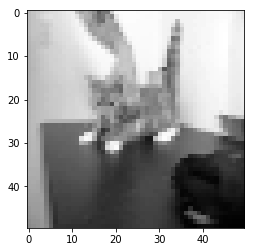

In [10]:
train_data = array(train_images)
train_label = array(train_labels)
val_data = array(val_images)
val_label = array(val_labels)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_data[0], cmap="gray")

trainingData_features = train_data/255
trainingData_label = train_label

valData_features = val_data/255
val_label = val_label

trainingData_features = trainingData_features.reshape(len(trainingData_features),IMG_SIZE,IMG_SIZE,1)

valData_features = valData_features.reshape(len(valData_features),IMG_SIZE,IMG_SIZE,1)

print(trainingData_features.shape)
print(trainingData_label.shape)
print(valData_features.shape)
print(val_label.shape)

### 2. 모델생성

In [11]:
from keras import Input
from keras import Sequential
from keras import layers, losses, optimizers
from keras.layers import Dense, Input, Flatten, Conv2D, Activation, MaxPooling2D

nclasses = 1
input_shape = (IMG_SIZE, IMG_SIZE, 1)

model=Sequential()

# window = 3,3
model.add(Conv2D(64, (3,3), input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 64 node cv
model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

Using TensorFlow backend.
W1003 21:01:16.879888  7264 deprecation_wrapper.py:119] From C:\Users\kopo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1003 21:01:16.972640  7264 deprecation.py:323] From C:\Users\kopo\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
from datetime import datetime
import os
import keras

now = datetime.now()

currDate = now.strftime("%Y_%m_%d_%H_%M")

save_tdir = "d:/tlog_{}".format(currDate)
save_tdir

save_wdir = "d:/wlog_{}".format(currDate)
save_wdir

callbacks = [
    
    keras.callbacks.TensorBoard(
     log_dir = save_tdir,
    write_graph=True,
    write_images=True),
    
    keras.callbacks.EarlyStopping(
    monitor = 'val_acc', patience=10,
    ),
    
    keras.callbacks.ModelCheckpoint(
    filepath = save_wdir,
    monitor = 'val_loss',
    save_best_only = True,)
    
]

In [13]:
history = model.fit(trainingData_features, trainingData_label,
                                     batch_size=16,
                                     epochs=1, validation_data = (valData_features,val_label),
                                     callbacks = callbacks)

W1003 21:01:20.670794  7264 deprecation_wrapper.py:119] From C:\Users\kopo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1003 21:01:20.677777  7264 deprecation_wrapper.py:119] From C:\Users\kopo\Anaconda3\lib\site-packages\keras\callbacks\tensorboard_v1.py:200: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1003 21:01:20.678774  7264 deprecation_wrapper.py:119] From C:\Users\kopo\Anaconda3\lib\site-packages\keras\callbacks\tensorboard_v1.py:203: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Train on 20000 samples, validate on 500 samples
Epoch 1/1
20000/20000 [==============================] - 74s 4ms/step - loss: 0.6434 - accuracy: 0.6262 - val_loss: 0.5491 - val_accuracy: 0.7260


W1003 21:02:35.274018  7264 deprecation_wrapper.py:119] From C:\Users\kopo\Anaconda3\lib\site-packages\keras\callbacks\tensorboard_v1.py:343: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

C:\Users\kopo\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


# 예측

In [23]:
test_image_path = '../images/cat_dog/input/test'

list_imgs= os.listdir(test_image_path) 

sort_imgs_num = [i+1 for i in range(len(list_imgs))] #1.jpg부터 시작
len(sort_imgs_num)

test_image = [] 
for imgs in sort_imgs_num: 
    img_path = os.path.join(test_image_path,str(imgs)+'.jpg') #원하는 목록리스트를 만듭니다.
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    test_image.append(new_img) #변환된 데이터를 리스트에 저장합니다. 

image_array = np.array(test_image)

print("이미지 모양확인", image_array.shape)

In [37]:
finalImg = image_array.reshape(len(image_array),IMG_SIZE,IMG_SIZE, 1)

print("이미지 모양확인", finalImg.shape)

predictions = model.predict(finalImg)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(X, y, num_figures): 
    plt.figure(figsize=(30, 20)) 
    for i in range(num_figures): 
        plt.subplot(2, num_figures, i+1) 
        plt.imshow(X[i]) 
        if y[i] >= 0.5: 
            plt.title("Dog ("+ str(y[i]) + ")", fontsize=30) 
        else: 
            plt.title("Cat ("+ str(y[i]) + ")", fontsize=30) 
        plt.tight_layout()

for i in range(0, 30, 6): 
    plot_data(test_image[i:], predictions[i:], 6)

In [44]:
import os, shutil 
test_image_path = '../images/cat_dog/input/test' 
copy_testImage_path = '../images/cat_dog/output/test' #str(i+1) 이유는 테스트사진이 1.jpg 부터 시작 
def test_copy_files(prefix_str,i): 
    image_paths = os.path.join(test_image_path ,str(i+1)+'.jpg') 
    data_dir = os.path.join(copy_testImage_path,prefix_str) 
    if not os.path.isdir(data_dir): 
        os.makedirs(data_dir) 
    shutil.copy(image_paths,data_dir) 
# 사진 자동 분류하기 
for i in range(len(predictions)): 
    img = predictions[i] 
    if img >= 0.5: 
        test_copy_files("dog",i) 
    else: 
        test_copy_files("cat",i) 
print("Mission Completed")

Mission Completed
